In [1]:
import mne
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Visualising Raw Data

Extracting EDF parameters from /app/EEG_Cat_Study4_II_II_S1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 389887  =      0.000 ...  1522.996 secs...
Using matplotlib as 2D backend.


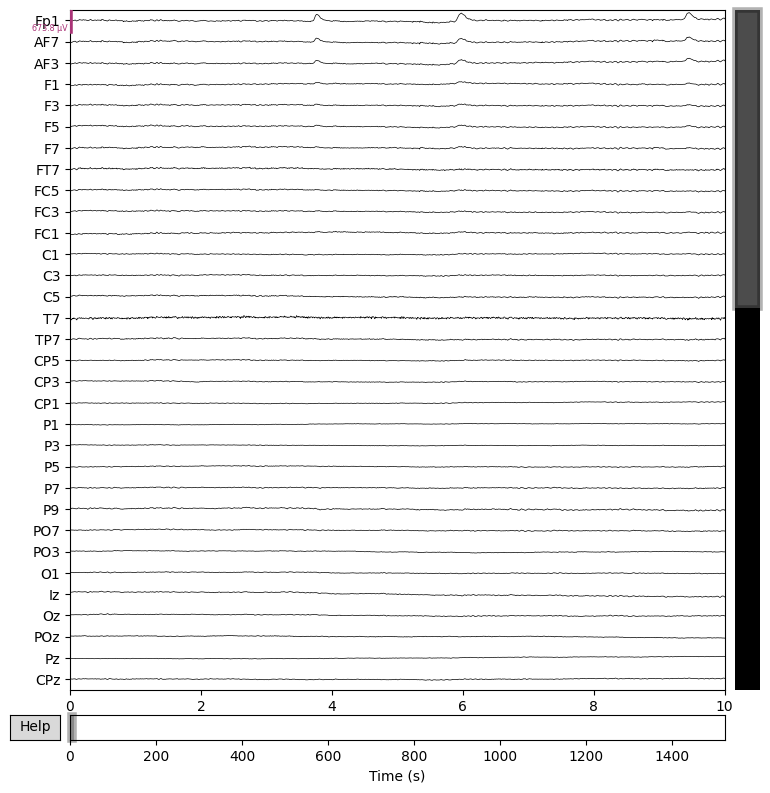

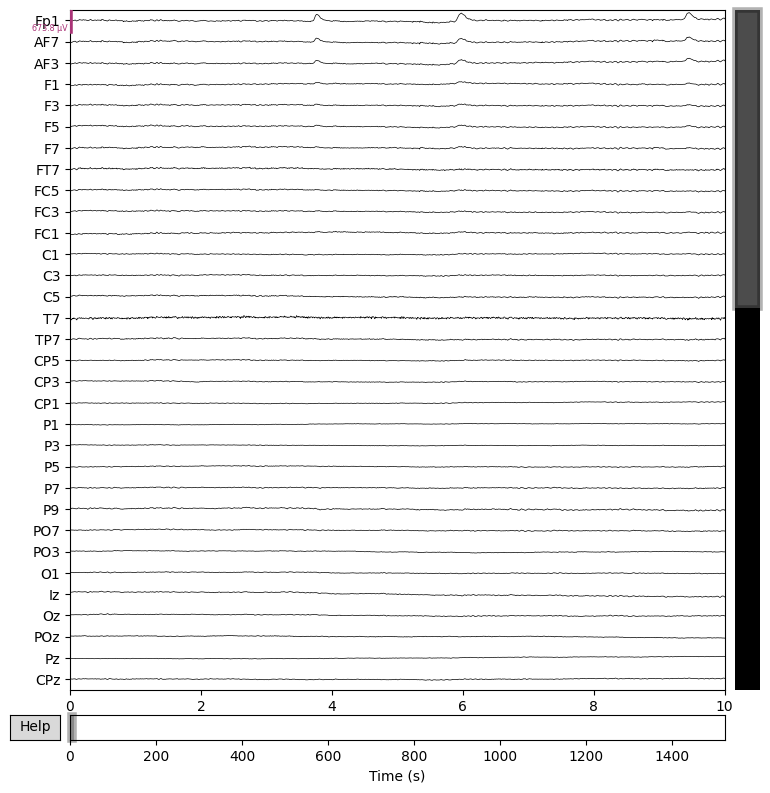

In [2]:
# Load the raw BDF file
raw = mne.io.read_raw_bdf('EEG_Cat_Study4_II_II_S1.bdf', preload=True)
raw.plot(n_channels=32, scalings='auto', title='Raw EEG')

Channels (Y-axis): The labels like FP1, AF7, F3, etc., represent EEG electrode positions based on the 10-20 system, which maps locations on the scalp (e.g., FP = frontal pole, F = frontal, C = central, P = parietal, O = occipital). 

Time (X-axis): The x-axis shows time in seconds, spanning from 0 to about 1400 seconds (roughly 23 minutes). This is the duration of your recording.

Signal (Waveforms): Each horizontal line represents the electrical activity (in microvolts) recorded by an electrode over time. The signals appear relatively flat with small fluctuations, which is common in raw EEG data before filtering or processing. The flatness might indicate low amplitude activity or a need for preprocessing to remove noise/artifacts.

Shading on the Right: The dark vertical bar at the end likely indicates the end of the recording or a marker/event in the data (e.g., the recording stopped or a specific condition changed).

In [3]:
#Finding the metadata
print("Channels:", raw.info['ch_names'])
print("Sampling rate:", raw.info['sfreq'])
print("Data shape:", raw.get_data().shape)

Channels: ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'M1', 'M2', 'NAS', 'LVEOG', 'RVEOG', 'LHEOG', 'RHEOG', 'NFpz', 'Status']
Sampling rate: 256.0
Data shape: (73, 389888)


## Interpretation of channels:

EEG Electrodes: Most channels (e.g., Fp1, F3, Cz, Pz) are scalp electrodes measuring brain activity. The naming reflects their positions: F (frontal), C (central), P (parietal), O (occipital), T (temporal), with odd numbers on the left (e.g., F3), even on the right (e.g., F4), and z for midline (e.g., Cz).

Reference/EOG Channels: Channels like M1, M2 (likely mastoid references), LVEOG, RVEOG (vertical eye movements), LHEOG, RHEOG (horizontal eye movements), and NAS (nasion) are not EEG but are used for re-referencing or artifact detection (e.g., eye blinks, muscle movements).

Other: NFpz might be a frontal midline electrode, and "Status" is likely a non-EEG channel recording events or triggers (common in BioSemi BDF files).

## Interpretation of Sampling Rate:

Temporal Resolution: At 256 Hz, you have a data point every 1/256 seconds (~3.9 ms), which gives good temporal resolution for capturing brain activity.

Frequency Range: The Nyquist frequency is 256/2 = 128 Hz, meaning you can accurately measure brain activity up to 128 Hz. This covers all major EEG frequency bands:
Delta (0.5–4 Hz)
Theta (4–8 Hz)
Alpha (8–12 Hz)
Beta (12–30 Hz)
Gamma (30–100 Hz) You can even capture some high-frequency activity (e.g., ripples up to 128 Hz), though gamma above 100 Hz might be less reliable due to noise.

Recording Duration: At 256 Hz, this corresponds to 389,888 / 256 = 1523 seconds (~25 minutes), which aligns with the ~1400 seconds in your earlier plot (the difference might be due to trimming or plotting a subset).

## Intepretation of Data Shape:

First Dimension (73): Matches your 73 channels (EEG electrodes + EOG + references + Status).
    
Second Dimension (389,888): The number of samples per channel, which at 256 Hz corresponds to 1523 seconds of recording (as calculated above).

## Conclusion

A 25-minute EEG recording at 256 Hz across 73 channels (including scalp, EOG, and reference/event) allows for the study of brain activity up to 128 Hz with standard temporal resolution.

# Bandpass Filtering

## Requirement:

EEG signals typically contain useful information in the 0.5–40 Hz range.

Frequencies below 0.5 Hz (drift) or above 40–50 Hz (muscle artifacts, electrical noise) are almost always noise.

In [4]:
#Apply bandpass filter (0.5–40 Hz is typical for EEG)
raw_filtered = raw.copy().filter(l_freq=0.5, h_freq=40.0)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.9s finished


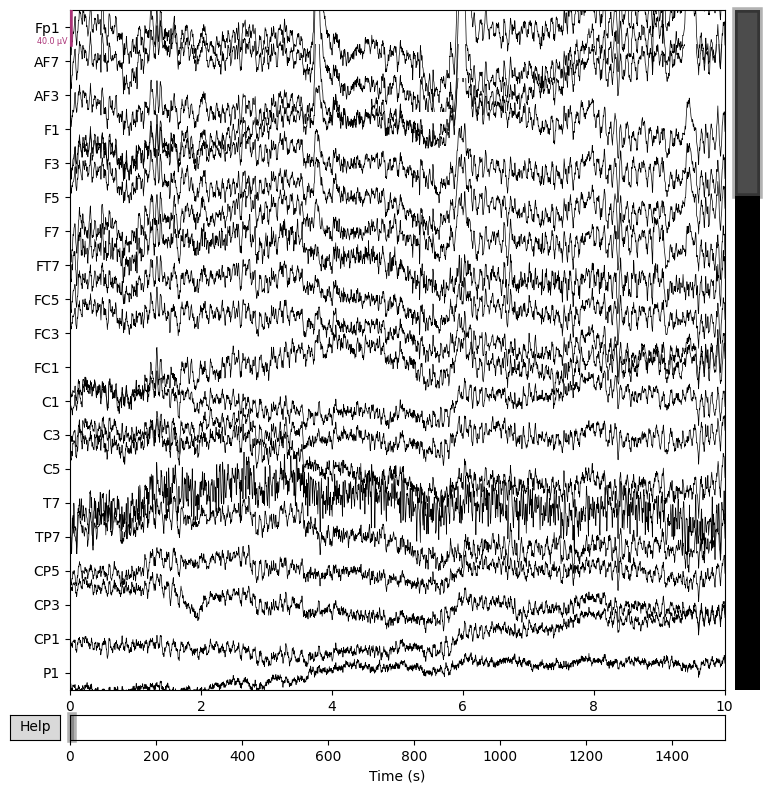

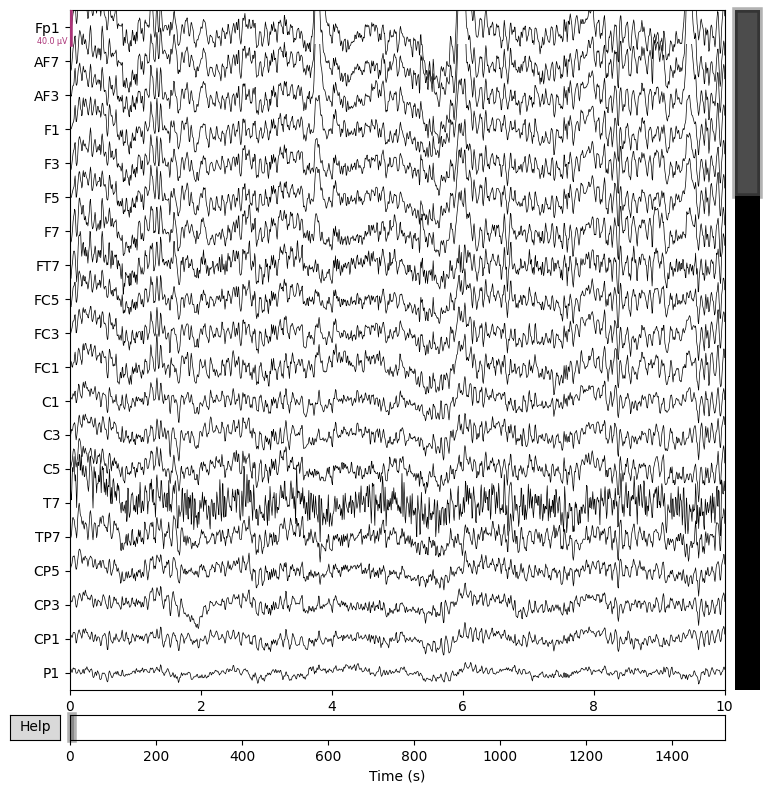

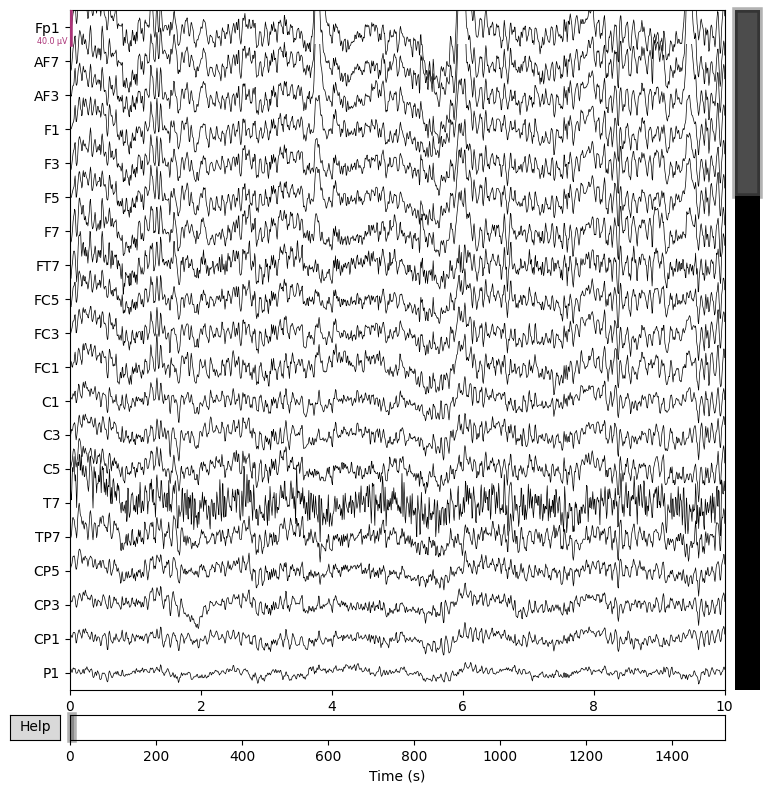

In [5]:
#Plot the raw vs. filtered signals to compare
raw.plot(title="Original EEG Signal")
raw_filtered.plot(title="Bandpass Filtered EEG Signal (0.5–40 Hz)")


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_1461/359959740.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.plot_psd(fmax=100)


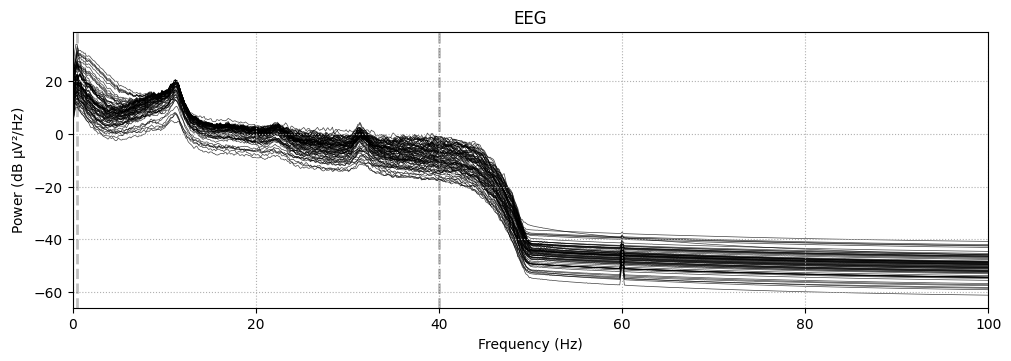

In [6]:
#detecting power line noise
raw_filtered.plot_psd(fmax=100)


## Wavelet Denoising: Step-by-Step

- Starting with `raw_filtered`: EEG data already band-pass filtered (0.5–40 Hz).
- Goal: Use wavelet transform to reduce noise within 0.5–40 Hz while keeping EEG features.
- Steps: Decompose signal, apply threshold, reconstruct, and visualize.

In [7]:
# Extract filtered EEG data
data_filtered = raw_filtered.get_data()  # Shape: (73, 389888)
n_channels, n_samples = data_filtered.shape

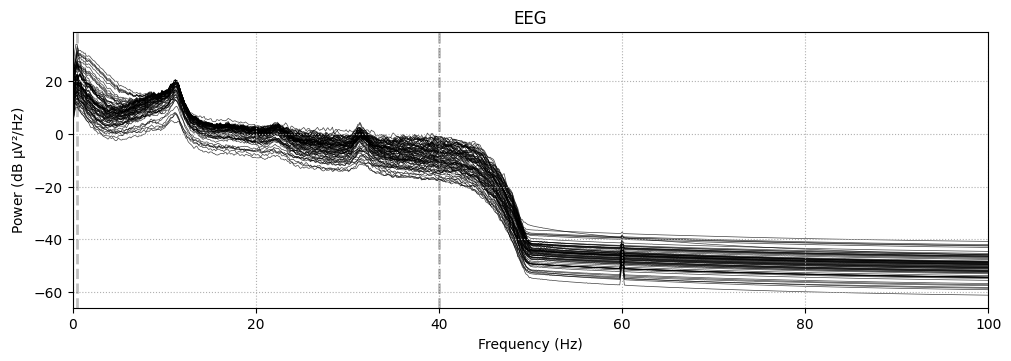

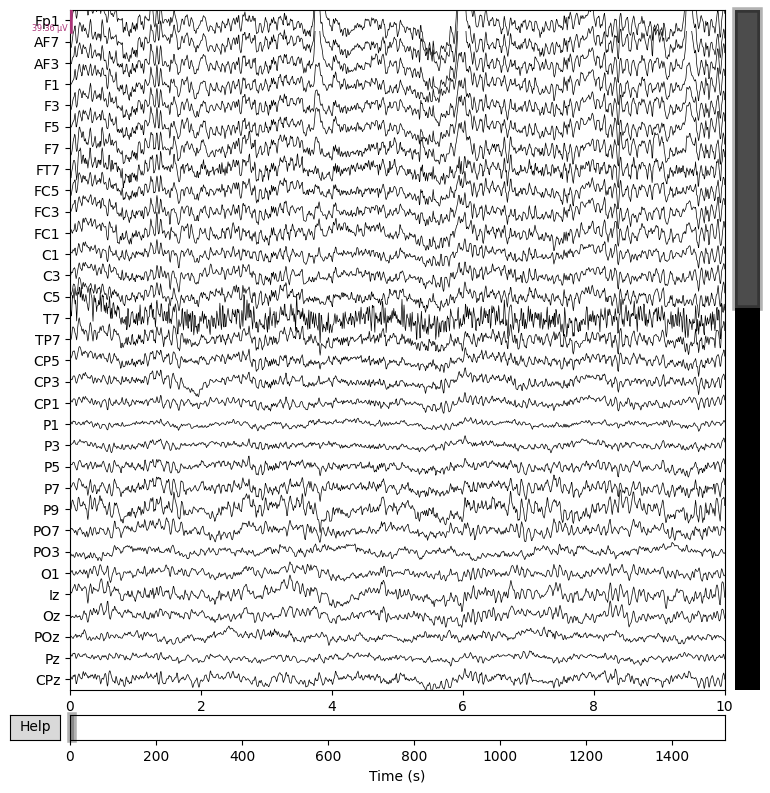

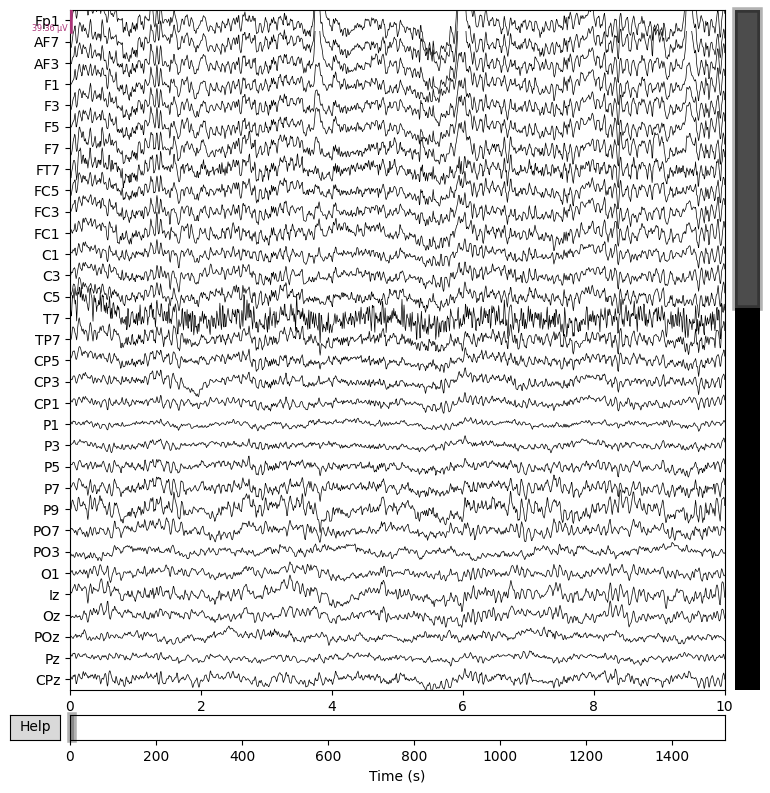

In [8]:
# Plot of filtered data
raw_filtered.plot(start=0, duration=10, n_channels=32, scalings='auto', title="Filtered EEG (Before Wavelet Denoising)")

## Interpretation: Filtered EEG

- Plot shows 32 channels, 10 seconds.
- Slow waves (e.g., alpha 8–12 Hz in posterior channels like Pz) are visible.
- Some high-frequency noise (e.g., muscle artifacts) and small fluctuations remain.

In [9]:
# Wavelet decomposition for all channels
wavelet = 'db4'  # Daubechies wavelet
level = 5  # Decomposition level
coeffs_list = []

# Decompose each channel
for ch_idx in range(n_channels):
    coeffs = pywt.wavedec(data_filtered[ch_idx, :], wavelet, level=level, mode='per')
    coeffs_list.append(coeffs)

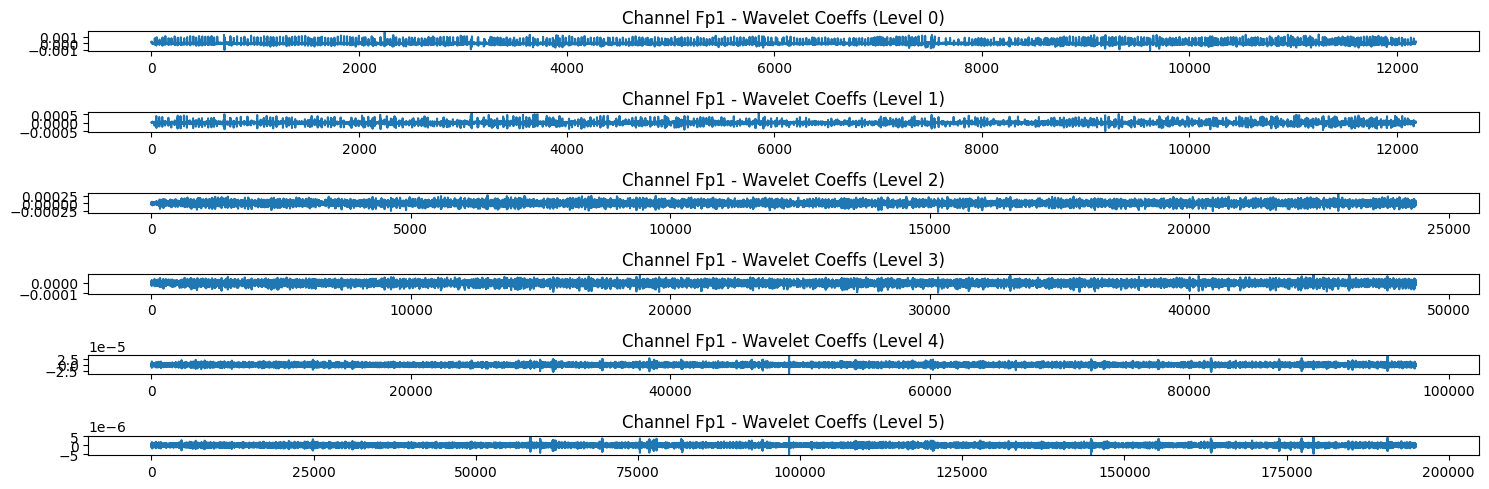

In [10]:
# Plot of first channel
plt.figure(figsize=(15, 5))
for i in range(len(coeffs_list[0])):
    plt.subplot(level + 1, 1, i + 1)
    plt.plot(coeffs_list[0][i])
    plt.title(f'Channel Fp1 - Wavelet Coeffs (Level {i})')
plt.tight_layout()
plt.show()

## Interpretation: Wavelet Coefficients

- Coeffs split into 6 parts: 1 approximation (level 0), 5 details (levels 1–5).
- Approximation (level 0): Low-frequency components (e.g., delta, theta).
- Details (levels 1–5): Higher frequencies (e.g., alpha, beta, gamma).
- High-frequency noise likely in higher detail levels (e.g., levels 4–5).

In [11]:
# Thresholding for noise removal
data_denoised = np.zeros_like(data_filtered)

# Apply soft thresholding to each channel
for ch_idx in range(n_channels):
    coeffs = coeffs_list[ch_idx]
    # Estimate noise level from finest detail coeffs
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(n_samples))
    
    # Soft threshold on detail coeffs (skip approximation: coeffs[0])
    for i in range(1, len(coeffs)):
        coeffs[i] = np.sign(coeffs[i]) * np.maximum(np.abs(coeffs[i]) - threshold, 0)
    
    # Reconstruct signal
    data_denoised[ch_idx, :] = pywt.waverec(coeffs, wavelet, mode='per')

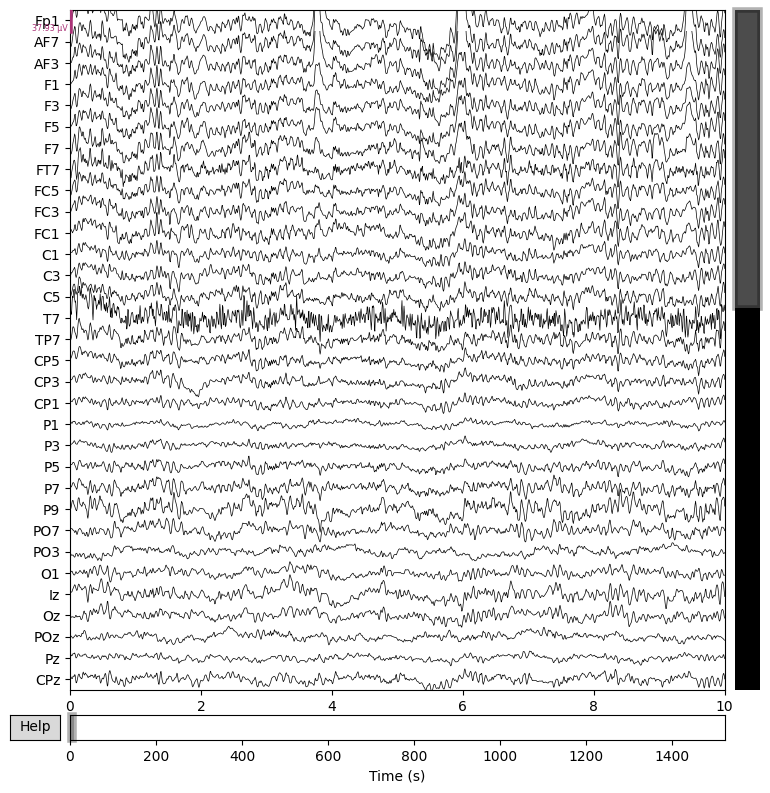

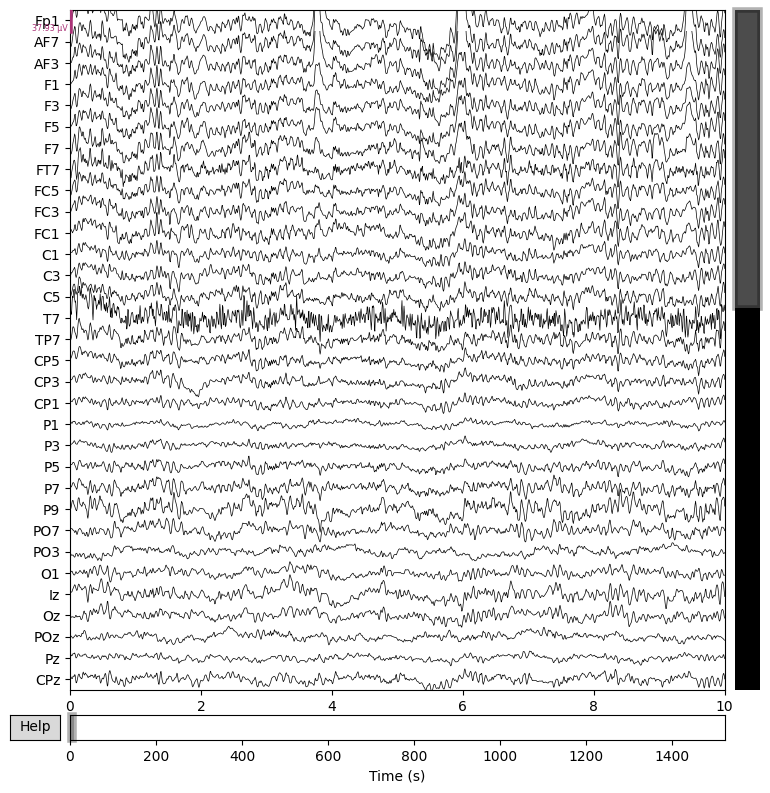

In [12]:
# Plot first 10 seconds of denoised data (32 channels)
raw_denoised = raw_filtered.copy()
raw_denoised._data = data_denoised
raw_denoised.plot(start=0, duration=10, n_channels=32, scalings='auto', title="Denoised EEG (After Wavelet Denoising)")

## Interpretation: Denoised EEG

- Denoised plot looks smoother than filtered plot.
- High-frequency noise (e.g., small rapid fluctuations) reduced.
- Slow waves (e.g., alpha in Pz, O1) preserved.
- Check frontal channels (e.g., Fp1): Eye blinks still present (to be removed later).

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


/tmp/ipykernel_1461/2500224778.py:2: RuntimeWarning: The legacy plot_psd() method got an unexpected keyword argument 'alpha', which is a parameter of Spectrum.plot(). Try rewriting as object.compute_psd(...).plot(..., alpha=<whatever>).
  raw_filtered.plot_psd(fmax=100, show=False, color='blue', alpha=0.5)


Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


/tmp/ipykernel_1461/2500224778.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.plot_psd(fmax=100, show=False, color='blue', alpha=0.5)
/tmp/ipykernel_1461/2500224778.py:3: RuntimeWarning: The legacy plot_psd() method got an unexpected keyword argument 'alpha', which is a parameter of Spectrum.plot(). Try rewriting as object.compute_psd(...).plot(..., alpha=<whatever>).
  raw_denoised.plot_psd(fmax=100, show=False, color='green', alpha=0.5)


Plotting power spectral density (dB=True).


/tmp/ipykernel_1461/2500224778.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_denoised.plot_psd(fmax=100, show=False, color='green', alpha=0.5)


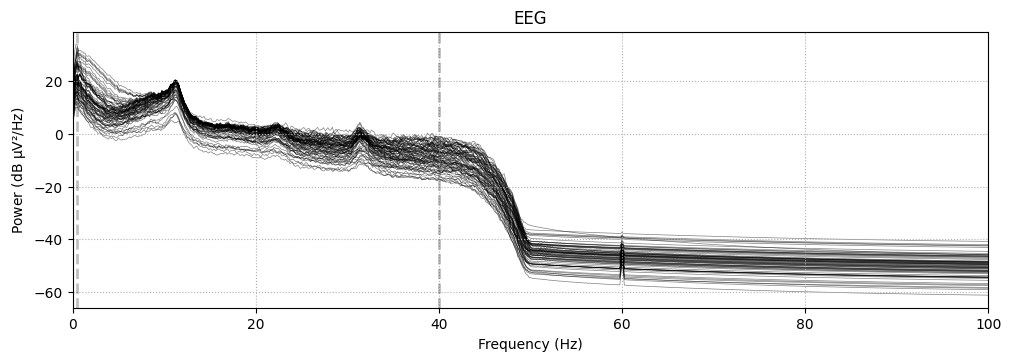

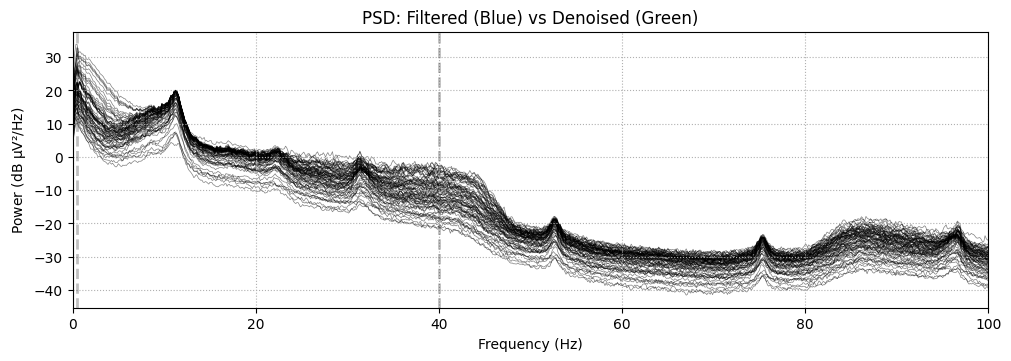

In [13]:
# Plot PSD to compare frequency content
raw_filtered.plot_psd(fmax=100, show=False, color='blue', alpha=0.5)
raw_denoised.plot_psd(fmax=100, show=False, color='green', alpha=0.5)
plt.title("PSD: Filtered (Blue) vs Denoised (Green)")
plt.show()

## Interpretation: PSD Comparison

- Blue: Filtered data PSD.
- Green: Denoised data PSD.
- Denoised PSD shows reduced power in higher frequencies (e.g., 30–40 Hz), likely muscle noise.
- Main EEG bands (0.5–30 Hz) preserved, confirming wavelet denoising kept brain signals.

## Adaptive Filtering: Step-by-Step

- Starting with `raw_denoised`: EEG data after wavelet denoising.
- Goal: Remove eye blinks using EOG channels (LVEOG, RVEOG, LHEOG, RHEOG).
- Steps: Create EOG reference, apply LMS filter, visualize changes.

In [14]:
# Extract denoised EEG data
data_denoised = raw_denoised.get_data()  # Shape: (73, 389888)
ch_names = raw_denoised.ch_names

In [15]:
# Select EEG and EOG channels
eeg_channels = [ch for ch in ch_names if ch not in ['LVEOG', 'RVEOG', 'LHEOG', 'RHEOG', 'M1', 'M2', 'Status']]
eog_channels = ['LVEOG', 'RVEOG', 'LHEOG', 'RHEOG']
eeg_indices = [ch_names.index(ch) for ch in eeg_channels]
eog_indices = [ch_names.index(ch) for ch in eog_channels]

In [16]:
# Average EOG channels for reference signal
eog_reference = np.mean(data_denoised[eog_indices, :], axis=0)

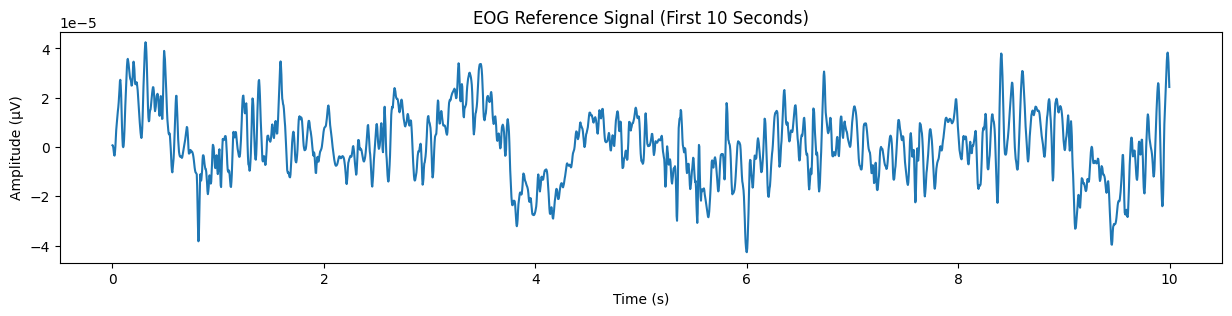

In [17]:
# Plot of EOG reference
plt.figure(figsize=(15, 3))
plt.plot(raw_denoised.times[:2560], eog_reference[:2560])
plt.title("EOG Reference Signal (First 10 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.show()

## Interpretation: EOG Reference

- Plot shows EOG signal (average of LVEOG, RVEOG, LHEOG, RHEOG).
- Large peaks (e.g., 50–100 µV) indicate eye blinks.
- These peaks will be used to remove blinks from EEG channels.

In [18]:
# LMS adaptive filtering
mu = 0.01  # Adaptation rate
filter_length = 32  # Filter length (125 ms at 256 Hz)
n_samples = data_denoised.shape[1]
data_adaptive = data_denoised.copy()

In [19]:
# Apply LMS to each EEG channel
for idx in eeg_indices:
    weights = np.zeros(filter_length)
    output = np.zeros(n_samples)
    eeg_signal = data_denoised[idx, :]
    for n in range(filter_length, n_samples):
        x_n = eog_reference[n-filter_length:n][::-1]  # Input vector
        y_n = np.dot(weights, x_n)  # Filter output
        error = eeg_signal[n] - y_n  # Error (cleaned signal)
        output[n] = error
        weights += 2 * mu * error * x_n  # Update weights
    data_adaptive[idx, :] = output

In [20]:
# Create new MNE object
raw_adaptive = raw_denoised.copy()
raw_adaptive._data = data_adaptive

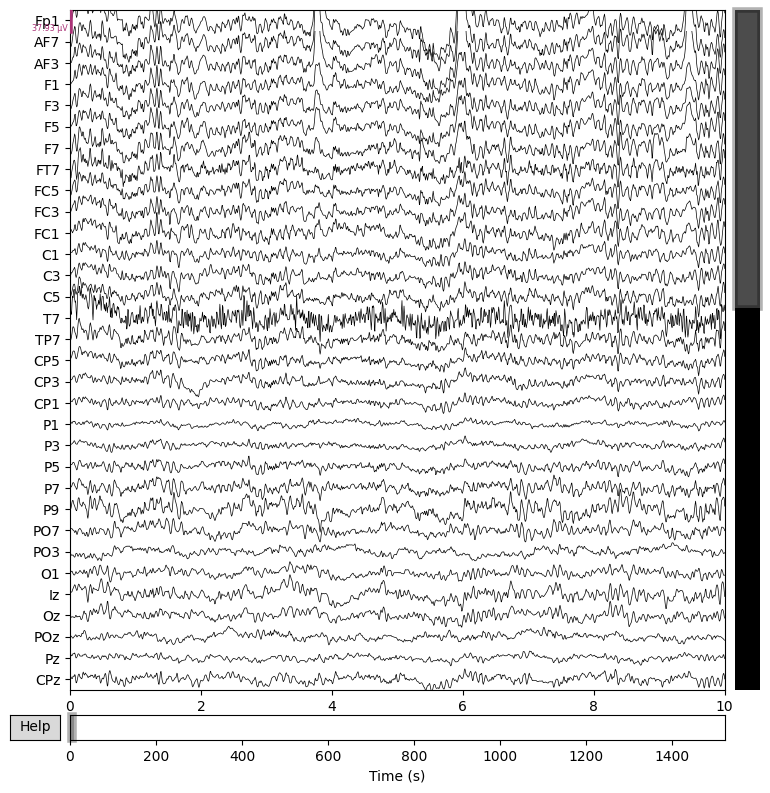

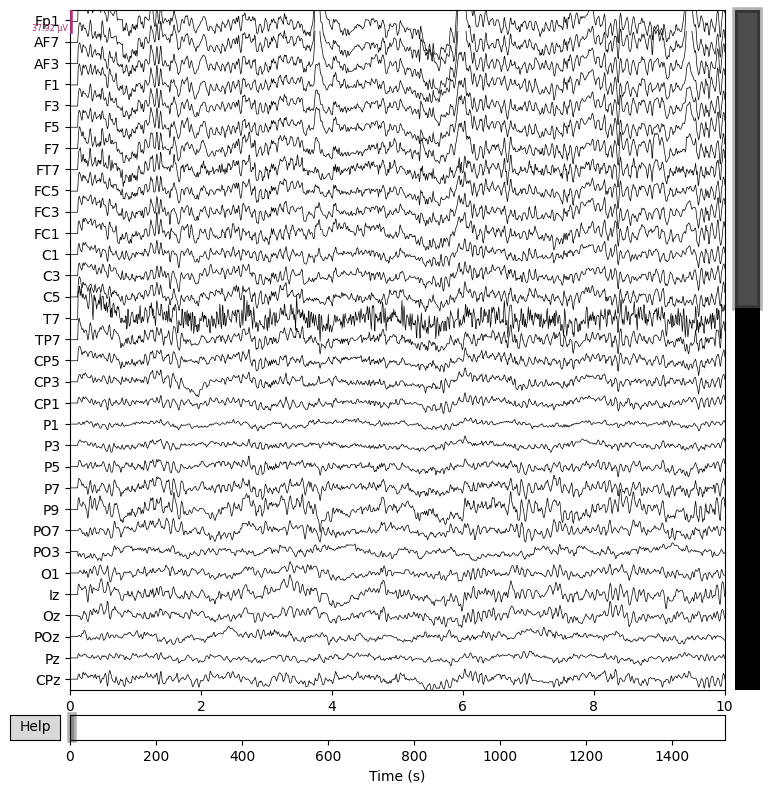

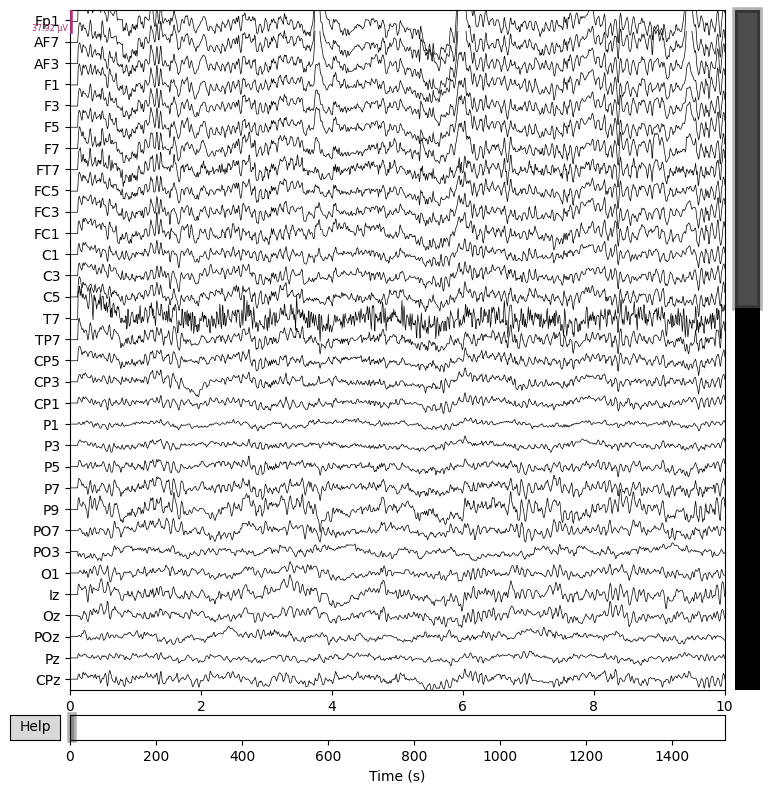

In [21]:
# Plot first 10 seconds before and after
raw_denoised.plot(start=0, duration=10, n_channels=32, scalings='auto', title="Denoised EEG (Before Adaptive Filtering)")
raw_adaptive.plot(start=0, duration=10, n_channels=32, scalings='auto', title="Cleaned EEG (After Adaptive Filtering)")

## Interpretation: EEG Before vs After

- **Before**: Frontal channels (e.g., Fp1, AF7) show large eye blink peaks.
- **After**: Eye blink peaks reduced or gone in frontal channels.
- Non-frontal channels (e.g., Pz, O1) mostly unchanged, preserving brain signals.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


/tmp/ipykernel_1461/198900471.py:2: RuntimeWarning: The legacy plot_psd() method got an unexpected keyword argument 'alpha', which is a parameter of Spectrum.plot(). Try rewriting as object.compute_psd(...).plot(..., alpha=<whatever>).
  raw_denoised.plot_psd(fmax=100, show=False, color='green', alpha=0.5)


Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


/tmp/ipykernel_1461/198900471.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_denoised.plot_psd(fmax=100, show=False, color='green', alpha=0.5)
/tmp/ipykernel_1461/198900471.py:3: RuntimeWarning: The legacy plot_psd() method got an unexpected keyword argument 'alpha', which is a parameter of Spectrum.plot(). Try rewriting as object.compute_psd(...).plot(..., alpha=<whatever>).
  raw_adaptive.plot_psd(fmax=100, show=False, color='red', alpha=0.5)


Plotting power spectral density (dB=True).


/tmp/ipykernel_1461/198900471.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_adaptive.plot_psd(fmax=100, show=False, color='red', alpha=0.5)


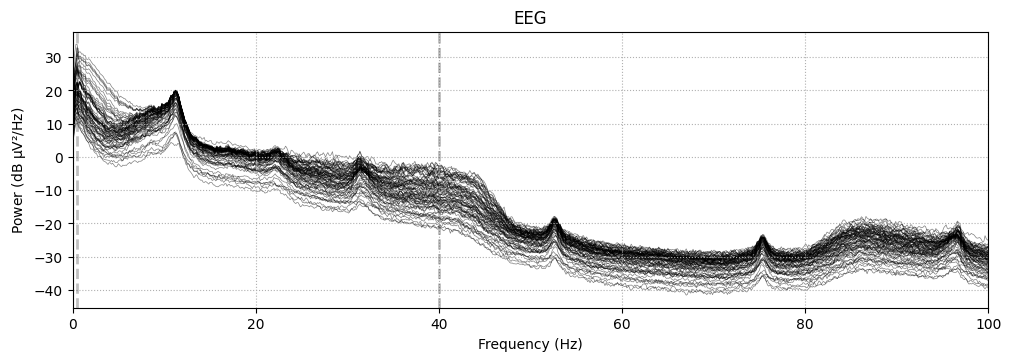

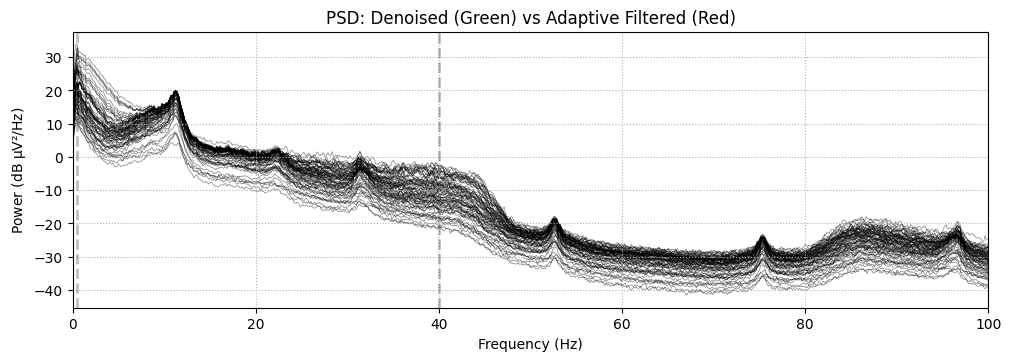

In [22]:
# Plot PSD to compare
raw_denoised.plot_psd(fmax=100, show=False, color='green', alpha=0.5)
raw_adaptive.plot_psd(fmax=100, show=False, color='red', alpha=0.5)
plt.title("PSD: Denoised (Green) vs Adaptive Filtered (Red)")
plt.show()

## Interpretation: PSD Comparison

- Green: Denoised data.
- Red: After adaptive filtering.
- Low frequencies (e.g., 0.5–4 Hz) slightly reduced due to blink removal.
- Main EEG bands (e.g., alpha 8–12 Hz) preserved.

# Final Conclusion
- Band-Pass Filter (0.5–40 Hz): Removed low-frequency drifts (skin potentials, movement) and high-frequency noise (50 Hz power line, muscle artifacts).
- Wavelet Denoising: Reduced remaining high-frequency noise (muscle artifacts) within 0.5–40 Hz, preserving EEG bands.
- Adaptive Filtering: Removed eye blink artifacts, mainly in frontal channels (e.g., Fp1, AF7), using EOG reference.

In [23]:
# Save the cleaned data
saved_file_path = '/app/EEG_Cat_Study4_II_II_S1_cleaned.fif'
raw_adaptive.save(saved_file_path, overwrite=True)
print(f"Cleaned data saved to: {saved_file_path}")

Overwriting existing file.
Writing /app/EEG_Cat_Study4_II_II_S1_cleaned.fif


/tmp/ipykernel_1461/1225304516.py:3: RuntimeWarning: This filename (/app/EEG_Cat_Study4_II_II_S1_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_adaptive.save(saved_file_path, overwrite=True)


Closing /app/EEG_Cat_Study4_II_II_S1_cleaned.fif
[done]
Cleaned data saved to: /app/EEG_Cat_Study4_II_II_S1_cleaned.fif
